# linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#data loading
#data collection
df=pd.read_csv('student_performance.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     999 non-null    int64
 1   Previous Scores                   999 non-null    int64
 2   Sleep Hours                       999 non-null    int64
 3   Sample Question Papers Practiced  999 non-null    int64
 4   Score                             999 non-null    int64
dtypes: int64(5)
memory usage: 39.2 KB


In [10]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Score
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66


In [11]:
##Data preprocessing

In [12]:
x=df.drop('Score',axis=1)
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [13]:
y=df['Score']
y.head()

0    91
1    65
2    45
3    36
4    66
Name: Score, dtype: int64

In [14]:
##EDA

<Axes: >

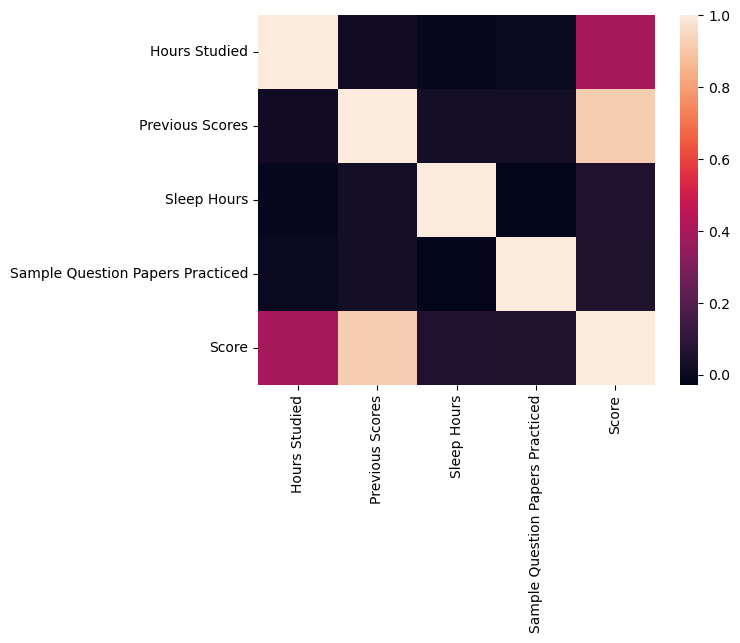

In [16]:
sns.heatmap(df.corr())

In [17]:
df.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Score
Hours Studied,1.000000,0.019571,-0.008309,0.000636,0.395810
Previous Scores,0.019571,1.000000,0.025785,0.027171,0.918698
Sleep Hours,-0.008309,0.025785,1.000000,-0.028262,0.059677
Sample Question Papers Practiced,0.000636,0.027171,-0.028262,1.000000,0.052308
Score,0.395810,0.918698,0.059677,0.052308,1.000000


In [18]:
#finding data patterns

<Axes: xlabel='Previous Scores', ylabel='Score'>

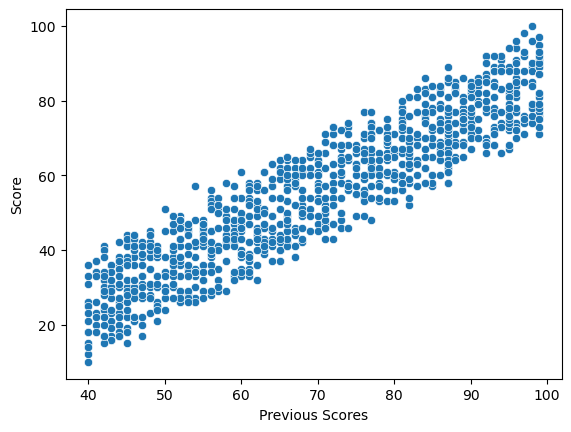

In [20]:
sns.scatterplot(df,x='Previous Scores',y='Score')

In [55]:
#the scatterplot describes if the previous scores are high then the final scares can be higher
#the scateerplot the points are tightly clustered along a straight upward trend and the relationship is linear
##linear regression is appropriate for the model and no major outliers

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

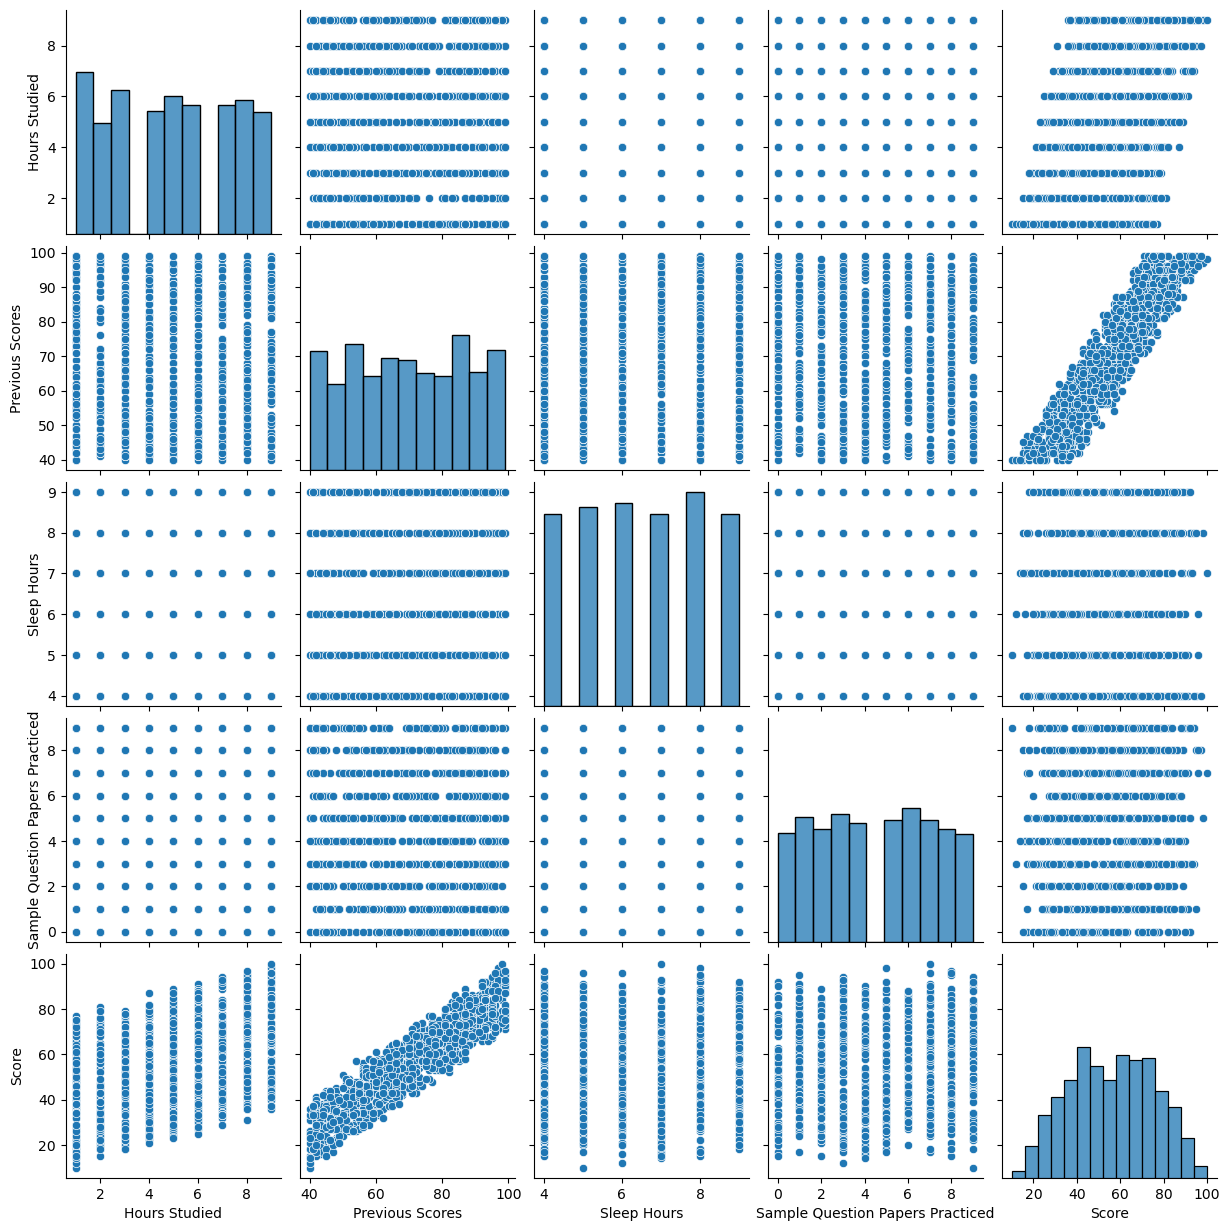

In [22]:
sns.pairplot(df)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [25]:
x_train.shape,y_train.shape

((699, 4), (699,))

In [26]:
x_test.shape,y_test.shape

((300, 4), (300,))

In [27]:
#algorithm selection

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [30]:
#Train the model

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
x_test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
525,4,93,9,7
298,2,60,7,3
109,7,89,8,1
695,8,75,4,3
194,9,59,8,2
...,...,...,...,...
449,4,40,6,5
389,8,94,8,6
969,1,59,7,9
325,6,62,7,6


In [34]:
#y_actual
y_test

525    76
298    35
109    81
695    68
194    54
       ..
449    21
389    88
969    34
325    51
481    41
Name: Score, Length: 300, dtype: int64

In [35]:
#generate new predictions
y_pred=model.predict(x_test)

In [36]:
y_pred[:10]

array([77.98079362, 36.98590808, 80.68199925, 67.78611101, 55.92683624,
       74.85126428, 27.67901964, 66.00679968, 91.73821973, 85.87805643])

In [37]:
#evaluate the model


In [38]:
#MAE
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mean_absolute_error(y_test,y_pred)

1.5905726932591535

In [40]:
#MSE
mean_squared_error(y_test,y_pred)

4.024670767148561

In [41]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

2.006158210896778

In [42]:
#evaluating residuals

In [43]:
#analyse scatter plot
residuals=y_test-y_pred

In [44]:
residuals[:10]

525   -1.980794
298   -1.985908
109    0.318001
695    0.213889
194   -1.926836
604    0.148736
246   -0.679020
827    2.993200
801    0.261780
513    3.121944
Name: Score, dtype: float64

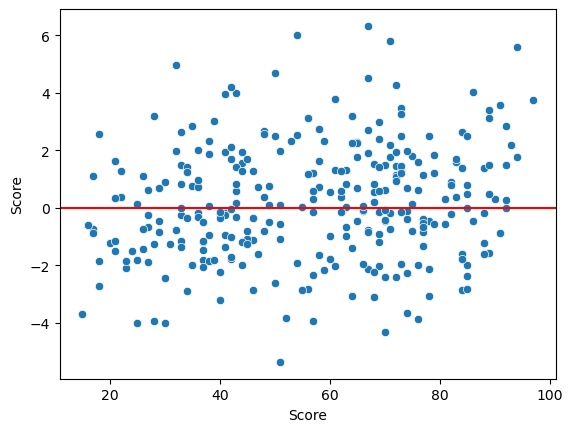

In [45]:
sns.scatterplot(x=y_test,y=residuals)  #scatterplot between x=prediction and y=residuals
plt.axhline(y=0,color='red')  #to draw the line at y=0

In [ ]:
#the residual plot indicated that the model is not bsised and the points are scattered randomly around 0 without any pattern

In [46]:
#prediction

In [47]:
x.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

In [51]:
# testing the predictions for a new student
student=np.array([[8,89,8,6]])

In [52]:
student

array([[ 8, 89,  8,  6]])

In [54]:
model.predict(student)   #the predictions mainly dependent on previous scores and study hours

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84.50028294])

In [56]:
#how to save the model

In [57]:
import joblib

In [58]:
joblib.dump(model,"Trained_student_score_model.pkl")

['Trained_student_score_model.pkl']

In [59]:
model

LinearRegression()

In [60]:
x_test.iloc[0]

Hours Studied                        4
Previous Scores                     93
Sleep Hours                          9
Sample Question Papers Practiced     7
Name: 525, dtype: int64

In [63]:
y_pred[30]

42.05513159105619